## Import Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
import plotly
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username ='tinaguo', api_key='AxiSJp6gRE7k0MoM0fbP')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plotly.tools.set_config_file(world_readable=True)


## Data Preprocessing

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum().max()
# no null values

0

In [6]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

           ...                 V21           V22           V23           V24  \
count      ...        2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean       ...        1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std        ...        7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min        ...       -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%        ...       -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%        ...       -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%        ...        1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max        ...        2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
print('Not Fraud Rate :', round(df['Class'].value_counts()[0]/len(df)*100, 2),'%')
print('Fraud Rate :', round(df['Class'].value_counts()[1]/len(df)*100, 2),'%')


Not Fraud Rate : 99.83 %
Fraud Rate : 0.17 %


In [9]:
# inbanlance data set, most of transactions are not fraud, if we use this data as base for models, will probably overfit.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

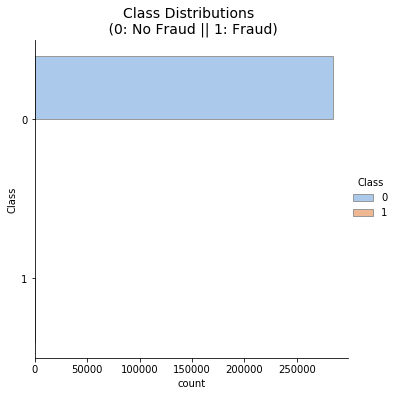

In [10]:
# visually 
sns.catplot(y="Class", hue="Class", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Text(0.5, 1.0, 'Distribution of Transaction Amount')

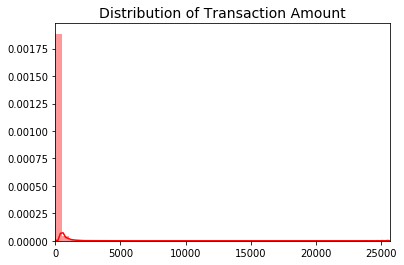

In [11]:
amount_val = df['Amount'].values
g = sns.distplot(amount_val, color='r')
g.set_xlim([min(amount_val), max(amount_val)])
g.set_title('Distribution of Transaction Amount', fontsize=14)

In [12]:
# build an interactive plot
plt.hist(amount_val, color = 'r')
plt.title('Distribution of Transaction Amount')
plt.xlabel("Amount")
plt.ylabel("Frequency")

fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly( fig )
py.iplot(plotly_fig, filename='mpl-basic-histogram')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tinaguo/0 or inside your plot.ly account where it is named 'mpl-basic-histogram'


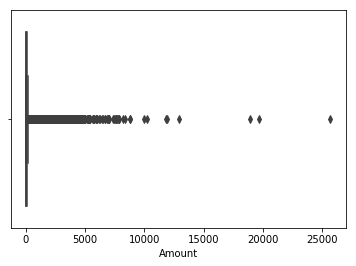

In [13]:
sns.boxplot(df.Amount, saturation = 0.5)
# there are some outlies, check outliers

In [14]:
df[df['Amount'] > 10000]

Time         V1         V2         V3         V4          V5  \
46841    42951.0 -23.712839 -42.172688 -13.320825   9.925019  -13.945538   
54018    46253.0 -21.780665 -38.305310 -12.122469   9.752791  -12.880794   
58465    48401.0 -36.802320 -63.344698 -20.645794  16.715537  -20.672064   
151296   95286.0 -34.549296 -60.464618 -21.340854  16.875344  -19.229075   
169457  119713.0 -20.924897 -37.943452 -14.060281  10.473005  -10.866639   
274771  166198.0 -35.548539 -31.850484 -48.325589  15.304184 -113.743307   
284249  172273.0  -9.030538 -11.112584 -16.233798   3.592021  -40.427726   

               V6          V7         V8        V9  ...          V21  \
46841    5.564891   15.710644  -2.844253 -1.580725  ...     7.921600   
54018    4.256017   14.785051  -2.818253 -0.667338  ...     7.437478   
58465    7.694002   24.956587  -4.730111 -2.687312  ...    11.455313   
151296   6.335259   24.422716  -4.964566  0.188912  ...    11.502580   
169457   6.256654   14.960521  -2.392155 -0.597076  ...     6.829810   
274771  73.301626  120.589494 -27.347360 -3.872425  ...   -21.620120   
284249  23.917837   44.054461  -7.277778 -4.210637  ...    -0.269048   

              V22        V23       V24       V25       V26        V27  \
46841   -6.320710 -11.310338  0.404175 -4.547278 -1.577118  -2.357385   
54018   -5.619439 -10.547038  0.653249 -4.232409 -0.480459  -2.257913   
58465  -10.933144 -17.173665  1.180700 -7.025783 -2.534330  -3.602479   
151296  -9.499423 -16.513186  0.744341 -7.081325 -2.604551  -3.550963   
169457  -6.926353  -9.928657 -0.447084 -4.848151 -2.241620  -2.140723   
274771   5.712303  -1.581098  4.584549  4.554683  3.415636  31.612198   
284249   0.988144   7.040028  0.347693  2.520869  2.342495   3.478175   

              V28    Amount  Class  
46841    2.253662  12910.93      0  
54018    2.082488  11898.09      0  
58465    3.450224  19656.53      0  
151296   3.250802  18910.00      0  
169457   2.001492  11789.84      0  
274771 -15.430084  25691.16      0  
284249  -2.713136  10199.44      0  

[7 rows x 31 columns]

In [15]:
df[df['Amount'] > 10000]['Class']
# none of these 7 records is claassified as "fraud"

46841     0
54018     0
58465     0
151296    0
169457    0
274771    0
284249    0
Name: Class, dtype: int64

Text(0.5, 1.0, 'Distribution of Transaction Time')

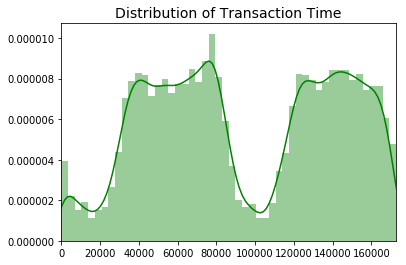

In [16]:
time_val = df['Time'].values
g = sns.distplot(time_val, color='g')
g.set_xlim([min(time_val), max(time_val)])
g.set_title('Distribution of Transaction Time', fontsize=14)

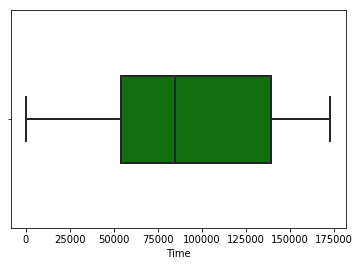

In [17]:
sns.boxplot(df.Time, color = 'g', linewidth=2.0, width= 0.4)

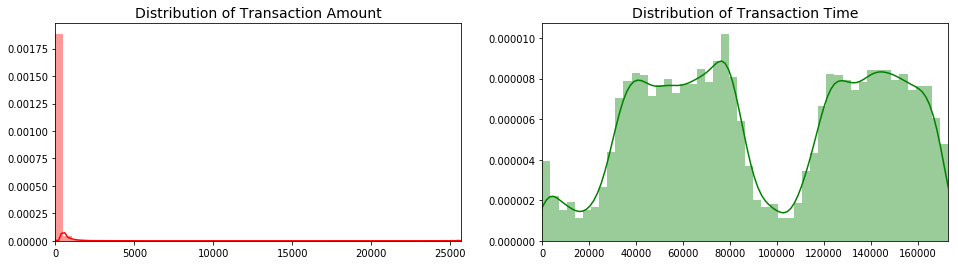

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
sns.distplot(amount_val,ax = ax[0], color='r')
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)

sns.distplot(time_val,ax = ax[1], color='g')
ax[1].set_xlim([min(time_val), max(time_val)])
ax[1].set_title('Distribution of Transaction Time', fontsize=14)

plt.show()


In [19]:
# cause other features have been scaled, I will should scale the rest of features(Amount, Time) as well
from sklearn.preprocessing import StandardScaler, RobustScaler
# robustscaler to reduce the effects of outliers
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

In [20]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9     ...            V23       V24       V25       V26  \
0  0.098698  0.363787     ...      -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425     ...       0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654     ...       0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024     ...      -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739     ...      -0.137458  0.141267 -0.206010  0.502292   

        V27       V28  Amount  Class  scaled_amount  scaled_time  
0  0.133558 -0.021053  149.62      0       1.783274    -0.994983  
1 -0.008983  0.014724    2.69      0      -0.269825    -0.994983  
2 -0.055353 -0.059752  378.66      0       4.983721    -0.994972  
3  0.062723  0.061458  123.50      0       1.418291    -0.994972  
4  0.219422  0.215153   69.99      0       0.670579    -0.994960  

[5 rows x 33 columns]

In [21]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

scaled_amount  scaled_time  Time        V1        V2        V3        V4  \
0       1.783274    -0.994983   0.0 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983   0.0  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972   1.0 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972   1.0 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960   2.0 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7  ...         V21       V22       V23  \
0 -0.338321  0.462388  0.239599  ...   -0.018307  0.277838 -0.110474   
1  0.060018 -0.082361 -0.078803  ...   -0.225775 -0.638672  0.101288   
2 -0.503198  1.800499  0.791461  ...    0.247998  0.771679  0.909412   
3 -0.010309  1.247203  0.237609  ...   -0.108300  0.005274 -0.190321   
4 -0.407193  0.095921  0.592941  ...   -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Amount  Class  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 33 columns]

In [22]:
df.drop(['Time','Amount'], axis=1, inplace=True)

In [23]:
df.head()

scaled_amount  scaled_time        V1        V2        V3        V4  \
0       1.783274    -0.994983 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...         V20       V21  \
0 -0.338321  0.462388  0.239599  0.098698  ...    0.251412 -0.018307   
1  0.060018 -0.082361 -0.078803  0.085102  ...   -0.069083 -0.225775   
2 -0.503198  1.800499  0.791461  0.247676  ...    0.524980  0.247998   
3 -0.010309  1.247203  0.237609  0.377436  ...   -0.208038 -0.108300   
4 -0.407193  0.095921  0.592941 -0.270533  ...    0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  Class  
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053      0  
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724      0  
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752      0  
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458      0  
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153      0  

[5 rows x 31 columns]

#### Considering the imbalance dataset can harm the predictability of traditional models. Therefore, I will resample the training dataset for better modeling.
#### To make the dataset balanced, I have the following approaches:


1. oversampling
2. undersmapling
3. SMOTE


#### Here, I want to cut down the majority class sample size to match the minortiy, i.e. undersampling approach

In [24]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
np.random.seed(37)
x = df.iloc[:, df.columns !='Class']
y = df.iloc[:, df.columns =='Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [25]:
# downsampe training data to get the dataset balanced in terms of class(fraud vs. normal ) (50/50)
count_fraud = len(y_train.ix[y_train.Class ==1,:])
count_normal = len(y_train.ix[y_train.Class ==0,:])
print(count_fraud, count_normal)


345 199019


In [41]:
normal_indices = y_train[y_train.Class == 0].index
fraud_indices = y_train[y_train.Class == 1].index
np.random.seed(307)
# randomly select 'nomal' records
random_normal_indices = np.random.choice(normal_indices, count_fraud, replace=False)
undersample_indices = np.concatenate([fraud_indices, random_normal_indices])

print(len(fraud_indices), len(random_normal_indices))

345 345


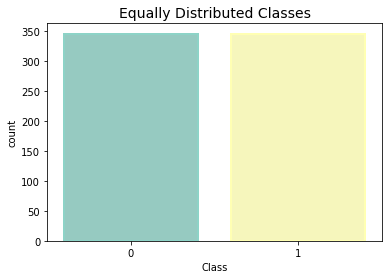

In [52]:
train_undersampled = df.iloc[undersample_indices]
sns.countplot("Class", data=train_undersampled, palette="Set3", linewidth=2,edgecolor=sns.color_palette("Set3", 3))
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()
#

In [62]:
train_undersampled.head()

scaled_amount  scaled_time        V1        V2        V3        V4  \
41569       -0.293440    -0.516336 -2.377533  0.520539 -8.094139  8.005351   
280143      -0.296793     0.994549  1.378559  1.289381 -5.004247  1.411850   
222419      -0.307413     0.684559  0.457845  1.373769 -0.488926  2.805351   
234633      -0.285195     0.744381  1.261324  2.726800 -5.435019  5.342759   
79835       -0.282960    -0.311247  0.340391  2.015233 -2.777330  3.812024   

              V5        V6        V7        V8  ...         V20       V21  \
41569   2.640750 -3.381586 -1.934372  0.562322  ...   -0.634747  0.148284   
280143  0.442581 -1.326536 -1.413170  0.248525  ...    0.226138  0.370612   
222419  1.777386  0.100492  1.295016 -0.135857  ...   -0.264705  0.105593   
234633  1.447043 -1.442584 -0.898702  0.123062  ...    0.313332  0.209086   
79835  -0.461729 -1.152022 -2.001959  0.548681  ...    0.326773  0.299769   

             V22       V23       V24       V25       V26       V27       V28  \
41569   0.721100  2.661291 -0.508620 -0.401657  0.587611  0.500326  0.551760   
280143  0.028234 -0.145640 -0.081049  0.521875  0.739467  0.389152  0.186637   
222419  0.371014  0.051105  0.401524 -0.724766 -0.202881  0.092124  0.094956   
234633 -0.425938 -0.154440 -0.018820  0.632234  0.192922  0.468181  0.280486   
79835  -0.583283 -0.187696 -0.329256  0.732328  0.058080  0.553143  0.318832   

        Class  
41569       1  
280143      1  
222419      1  
234633      1  
79835       1  

[5 rows x 31 columns]

In [55]:
feature_set_1 = pd.concat([train_undersampled.iloc[:, 0:15], train_undersampled["Class"]], axis=1)
feature_set_2 = train_undersampled.iloc[:, 15:31]

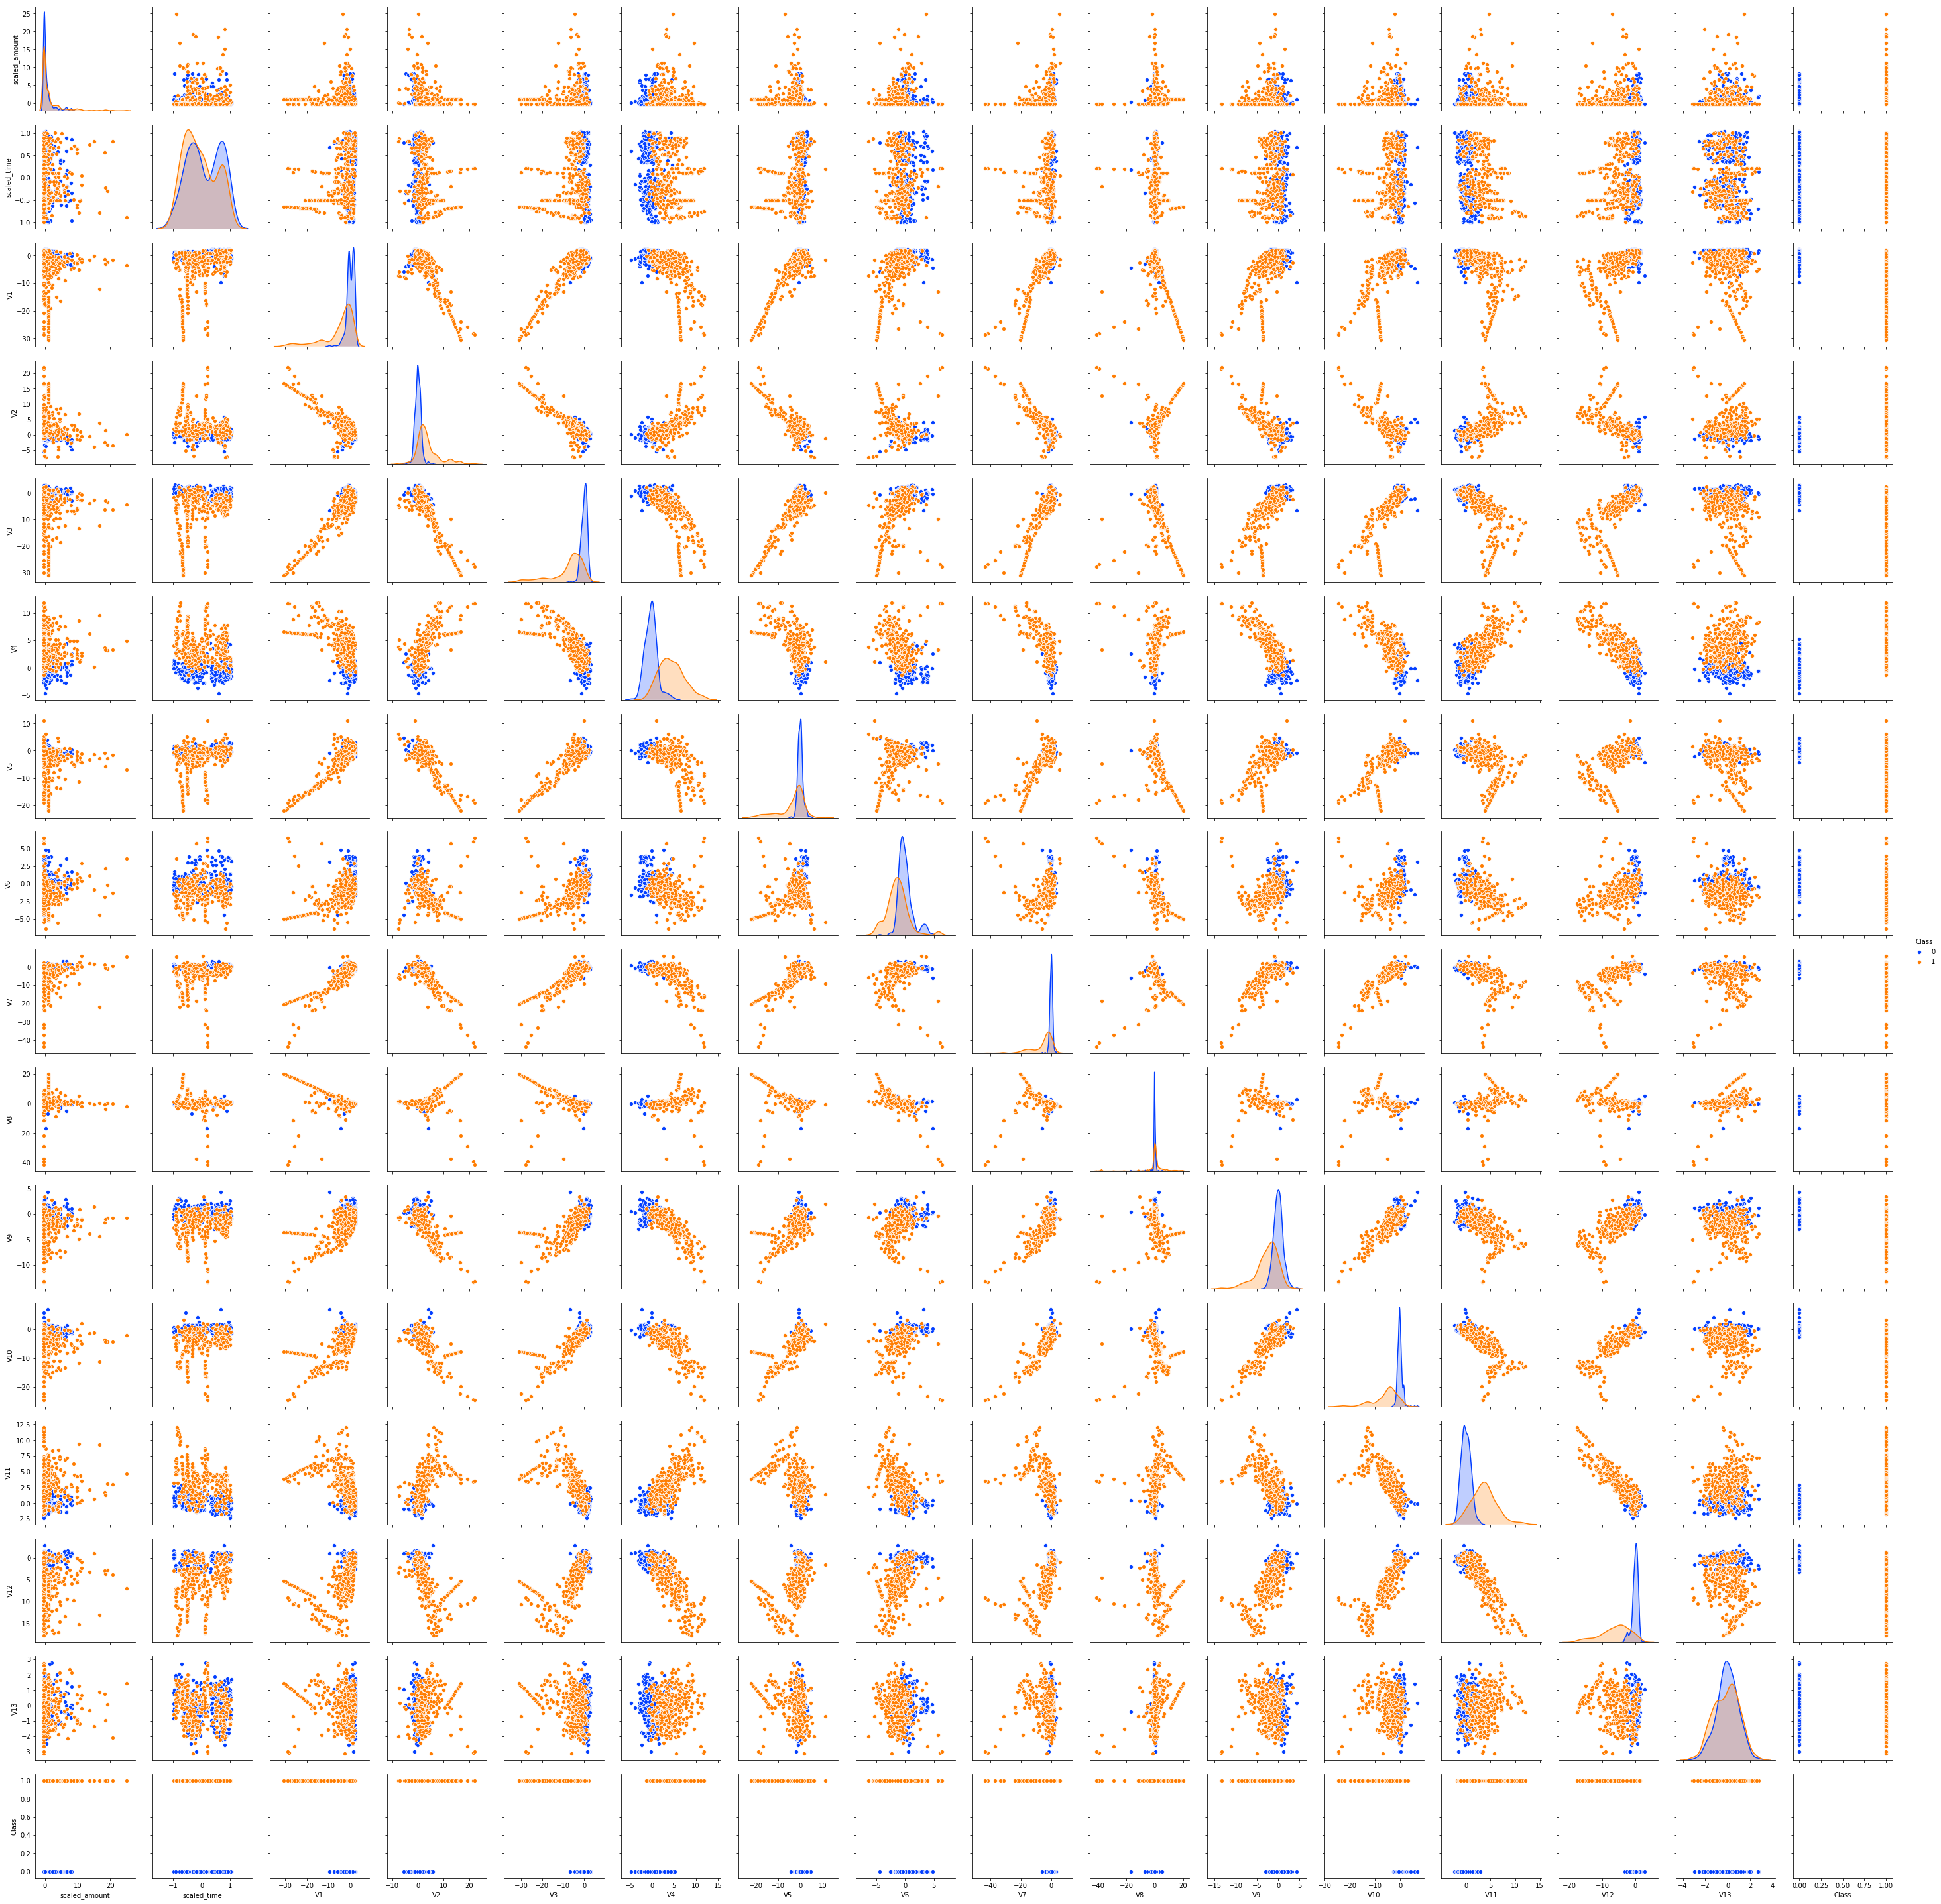

In [96]:
sns.pairplot(feature_set_1, hue = "Class",palette="bright" )

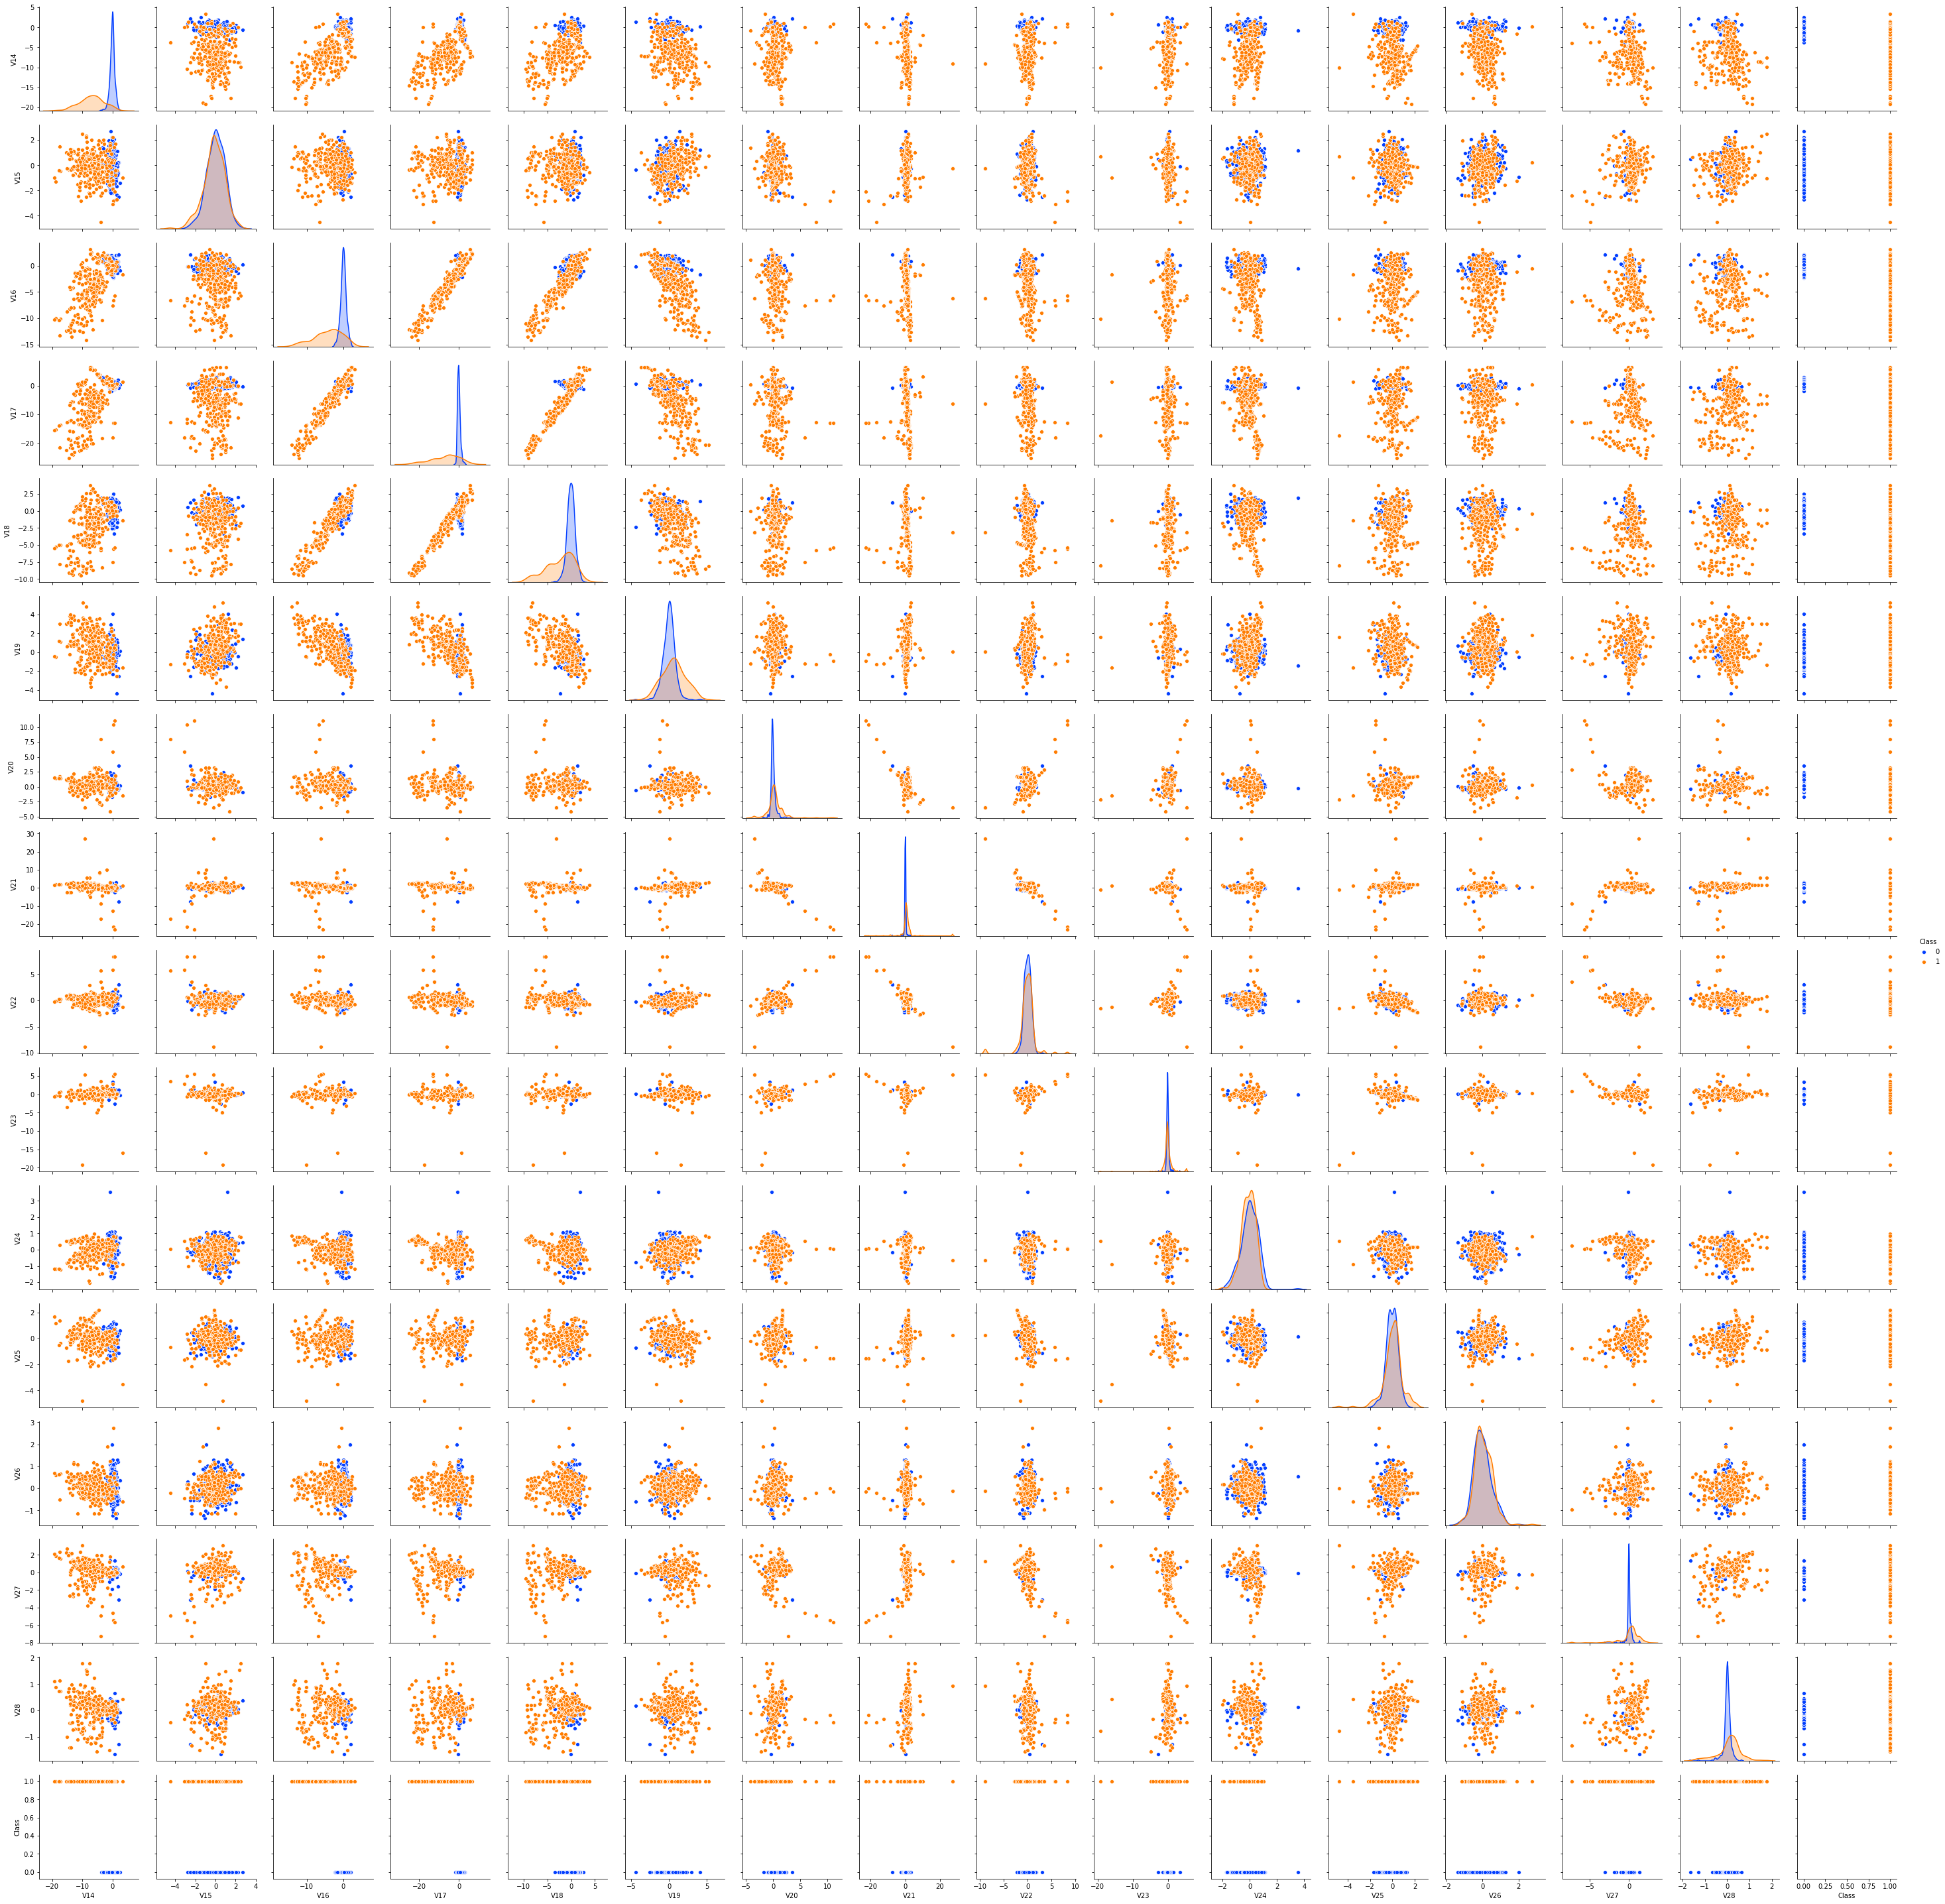

In [95]:
sns.pairplot(feature_set_2, hue = "Class",palette="bright")

#### It is obviously that two classes can't seperate from one to another, so logistic regression and random forest might be good choices for modeling.

## Modeling

In [65]:
x_train_undersample = x_train.ix[undersample_indices, :]
y_train_undersample = y_train.ix[undersample_indices, :]

### Logistic Classifier(L1 penalty)

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

In [152]:
logit = LogisticRegressionCV(penalty = 'l1', cv = 10, solver = 'liblinear')
logit = logit.fit(x_train_undersample, y_train_undersample.values.ravel())
clf_logit = logit.fit(x_train_undersample, y_train_undersample.values.ravel())
print ("The best parameter C is",logit.C_[0])

The best parameter C is 0.3593813663804626


In [153]:
ceof_ = logit.coef_.tolist()[0]
feature_names = x_train_undersample.columns.values.tolist()
pd.DataFrame({
    'feature_name': feature_names,
    'values' : ceof_
})

feature_name    values
0   scaled_amount  0.177839
1     scaled_time  0.000000
2              V1 -0.051411
3              V2  0.000000
4              V3 -0.062065
5              V4  0.664125
6              V5  0.145538
7              V6 -0.105556
8              V7  0.000000
9              V8 -0.262458
10             V9  0.000000
11            V10 -0.045098
12            V11  0.319002
13            V12 -0.389045
14            V13 -0.168341
15            V14 -0.715818
16            V15 -0.089712
17            V16 -0.248460
18            V17  0.000000
19            V18  0.000000
20            V19  0.000000
21            V20 -0.338091
22            V21  0.229173
23            V22  0.077844
24            V23 -0.048316
25            V24  0.000000
26            V25  0.000000
27            V26  0.000000
28            V27  0.000000
29            V28  0.000000

### Random Forest Classifier

In [264]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
rfc = RandomForestClassifier(n_jobs = -1, bootstrap = True, oob_score = True)
param_grid = {
    'n_estimators':[50, 100, 200, 500, 700],
    'max_features':['sqrt', 'log2'],
    'criterion':['gini', 'entropy']
}
clf_rfc = GridSearchCV(rfc, param_grid= param_grid, cv = 5)
clf_rfc = clf_rfc.fit(x_train_undersample, y_train_undersample.values.ravel())

print('The best parameters are', clf_rfc.best_params_)

The best parameters are {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}


### Resampling and Model Selection

#### Regenerate data from training data to make prediction and will make a new undersampling training dataset from model selection.

In [156]:
from sklearn.metrics import (precision_recall_curve, precision_score, roc_auc_score,roc_curve,
confusion_matrix, auc, classification_report, recall_score)


In [157]:
np.random.seed(370)
random_normal_indices_1 = np.random.choice(normal_indices, count_fraud, replace = False)
undersample_indices_1 = np.concatenate([fraud_indices,random_normal_indices_1])
train_undersampled_1 = df.iloc[undersample_indices_1]
train_undersampled_1.shape
train_undersampled_1.head()

scaled_amount  scaled_time        V1        V2        V3        V4  \
41569       -0.293440    -0.516336 -2.377533  0.520539 -8.094139  8.005351   
280143      -0.296793     0.994549  1.378559  1.289381 -5.004247  1.411850   
222419      -0.307413     0.684559  0.457845  1.373769 -0.488926  2.805351   
234633      -0.285195     0.744381  1.261324  2.726800 -5.435019  5.342759   
79835       -0.282960    -0.311247  0.340391  2.015233 -2.777330  3.812024   

              V5        V6        V7        V8  ...         V20       V21  \
41569   2.640750 -3.381586 -1.934372  0.562322  ...   -0.634747  0.148284   
280143  0.442581 -1.326536 -1.413170  0.248525  ...    0.226138  0.370612   
222419  1.777386  0.100492  1.295016 -0.135857  ...   -0.264705  0.105593   
234633  1.447043 -1.442584 -0.898702  0.123062  ...    0.313332  0.209086   
79835  -0.461729 -1.152022 -2.001959  0.548681  ...    0.326773  0.299769   

             V22       V23       V24       V25       V26       V27       V28  \
41569   0.721100  2.661291 -0.508620 -0.401657  0.587611  0.500326  0.551760   
280143  0.028234 -0.145640 -0.081049  0.521875  0.739467  0.389152  0.186637   
222419  0.371014  0.051105  0.401524 -0.724766 -0.202881  0.092124  0.094956   
234633 -0.425938 -0.154440 -0.018820  0.632234  0.192922  0.468181  0.280486   
79835  -0.583283 -0.187696 -0.329256  0.732328  0.058080  0.553143  0.318832   

        Class  
41569       1  
280143      1  
222419      1  
234633      1  
79835       1  

[5 rows x 31 columns]

In [158]:
x_train_undersample_1 = x_train.ix[undersample_indices_1, :]
y_train_undersample_1 = y_train.ix[undersample_indices_1, :]

In [159]:
# predict with the default threshold 0.5
y_train_pred_logit = logit.predict(x_train_undersample_1.values)
y_train_pred_rfc = clf_rfc.predict(x_train_undersample_1.values)

#### use ROC with AUC Score and PR Curve to evaluate model performance

In [160]:
import itertools
np.set_printoptions(precision = 3)

In [176]:
# def a function that print and plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title = 'Confusion Matrix',
                          cmap = plt.cm.GnBu
                         ):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap, alpha = 0.8)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    plt.grid(False)
    

    thresh = cm.max()/2.0
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,i, cm[i,j],
            horizontalalignment='center',
            color='white' if cm[i, j]> thresh else 'black')
    plt.tight_layout()
    plt.ylabel('Ture label')
    plt.xlabel ('Predicted label')       

In [177]:
cm_logit = confusion_matrix(y_train_undersample_1, y_train_pred_logit)
cm_rfc = confusion_matrix(y_train_undersample_1, y_train_pred_rfc)
classes_name = ['Legittimate', 'Fraud']

Text(0.5, 1.0, 'Confusion Matrix of Random Forest')

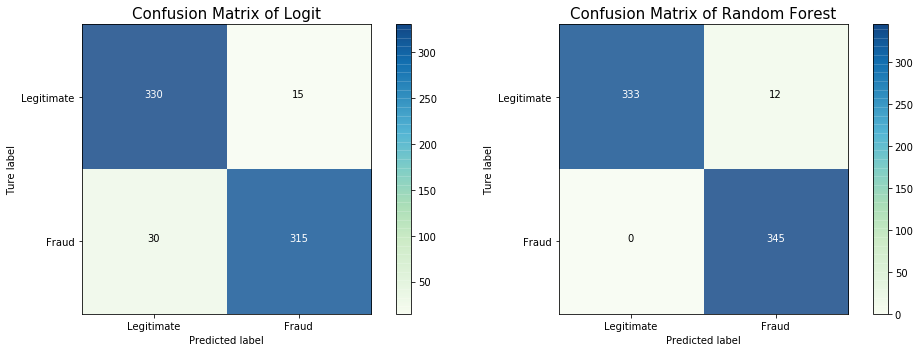

In [267]:
# plot the confusion matrix
figure = plt.figure(figsize = (14, 5))
ax = figure.add_subplot(1,2, 1)
plot_confusion_matrix(cm_logit, classes_name)
plt.title('Confusion Matrix of Logit', fontsize = 15)

ax = figure.add_subplot(1, 2, 2)
plot_confusion_matrix(cm_rfc, classes_name)
plt.title('Confusion Matrix of Random Forest', fontsize = 15)

In [179]:
# ROC CURVE
def plot_roc_curve(clf, x_train, y_train):
    
    y_pred_score = clf.predict_proba(x_train)[:,1]
    #print "y_pred_score: "
    #print(y_pred_score)
    #print "y_true: "
    #print(y_train.values.ravel())
    fpr, tpr, thresholds = roc_curve(y_train.values.ravel(), y_pred_score)
    roc_auc = auc(fpr,tpr)
    # Plot ROC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [180]:
# Precision Recall Curve
def plot_Precision_Recall_Curve(clf, x_train, y_train):
    
    probas_pred = clf.predict_proba(x_train)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_train.values.ravel(), probas_pred)
    #print 'Pricision: ', precision
    pr_auc = auc(recall, precision)
    # Plot Precision-Recall curve
    plt.plot(precision, recall, label='AUC = %0.2f'% pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.03])
    plt.xlim([0.0, 1.03])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

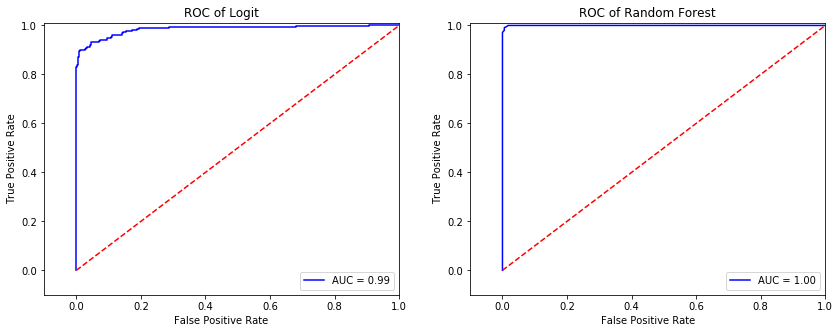

In [268]:
# ROC with AUC score
figure = plt.figure(figsize=(14,5))

ax = figure.add_subplot(1,2,1)
plot_roc_curve(clf_logit, x_train_undersample_1, y_train_undersample_1)
plt.title("ROC of Logit")

ax = figure.add_subplot(1,2,2)
plot_roc_curve(clf_rfc, x_train_undersample_1, y_train_undersample_1)
plt.title("ROC of Random Forest");

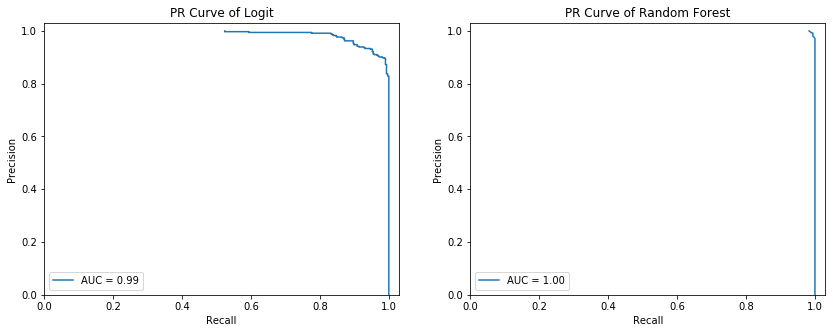

In [269]:
# Precison Recall curve with auc score

figure = plt.figure(figsize=(14,5))

ax = figure.add_subplot(1,2,1)
plot_Precision_Recall_Curve(clf_logit, x_train_undersample_1, y_train_undersample_1)
plt.title('PR Curve of Logit')

ax = figure.add_subplot(1,2,2)
plot_Precision_Recall_Curve(clf_rfc, x_train_undersample_1, y_train_undersample_1)
plt.title('PR Curve of Random Forest');

Conclusion:
Random Forest gave an amazing performance. But in the reality, financial institutes will pay financially when they misclassify the transactions, and the conventional model doesn't take this into consideration, so at this point I'd like to introduce a cost sensitive model to make classification--Bayesian Risk Minimization Approcach.

### Cost Sensitive Classfier

Either wrongly detect a fraudulent transaction or fail to detect a fraudulent transaction is costly. Taking cost into consideration and  choose a classifer that minimizes the total cost is optimal.

Cost Matrix

1. (Fraud, Fraud): both the detected and true labels are "fraud", where financial institutes need a fixed number of cost to deal with this situation, let's say $C_a$.
2. (Legitimate, Fraud): FIs detect as normal but actually is a fraud, where the financial institute would lose the total numnber spent on this transaction.
3. (Fraud, Legitimate): FIs detect as a Fraud but actually a normal one, where card holders would call the FIs to repay the order with 50% probability and give up the transaction with 50% probability. Actually there are intangible losses for FIs in this situation which is the satisfaction decline of the cusotmers, but at this point I just neglect it.
4. (Legitimate, Legitimate): no cost.


#### threshold based approach
cost function to the logistic model and random forest model I got above and to choose the optimal model and its corresponding threshold to minimize the total cost

In [183]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [222]:
def create_cost_df(model, x, y, thresholds):
    results = []
    Amount = x.scaled_amount.tolist()
    for i in range(len(thresholds)):
        y_pred = model.predict_proba(x)[:,1] > thresholds[i]
        y_pred = 1*y_pred
    
        result_i = pd.DataFrame(
            {
                'Amt': Amount,
                't': y.Class.tolist(),
                'p': y_pred
            }
        )
        

        result_i["Ca"] = 2
        result_i["cost"] = result_i.t*(result_i.p*result_i.Ca + (1 - result_i.p)*result_i.Amt) + (1 - result_i.t)*result_i.Ca
        result_i["recall_score"] = recall_score(y, y_pred)
        result_i["precision_score"] = precision_score(y, y_pred)
        
        result_i = result_i.groupby(['recall_score','precision_score'])['cost'].mean().reset_index()
        result_i['threshold'] = thresholds[i]
        
        results.append(result_i)
    
    results = pd.concat(results, axis=0, ignore_index=True)
    return results

In [223]:
cost_df_logit = create_cost_df(logit, x_train_undersample_1, y_train_undersample_1, thresholds)
cost_df_logit

recall_score  precision_score      cost  threshold
0      0.991304         0.793503  1.991241        0.1
1      0.962319         0.897297  1.970930        0.2
2      0.939130         0.928367  1.964694        0.3
3      0.927536         0.952381  1.975978        0.4
4      0.913043         0.954545  1.972430        0.5
5      0.904348         0.971963  1.974624        0.6
6      0.898551         0.984127  1.968031        0.7
7      0.881159         0.990228  1.973115        0.8
8      0.872464         0.990132  1.965621        0.9

In [224]:
cost_df_rfc = create_cost_df(clf_rfc, x_train_undersample_1, y_train_undersample_1, thresholds)
cost_df_rfc

recall_score  precision_score      cost  threshold
0      1.000000         0.735608  2.000000        0.1
1      1.000000         0.821429  2.000000        0.2
2      1.000000         0.893782  2.000000        0.3
3      1.000000         0.927419  2.000000        0.4
4      1.000000         0.966387  2.000000        0.5
5      0.994203         0.988473  1.994013        0.6
6      0.971014         1.000000  1.978955        0.7
7      0.924638         1.000000  1.980405        0.8
8      0.857971         1.000000  1.986599        0.9

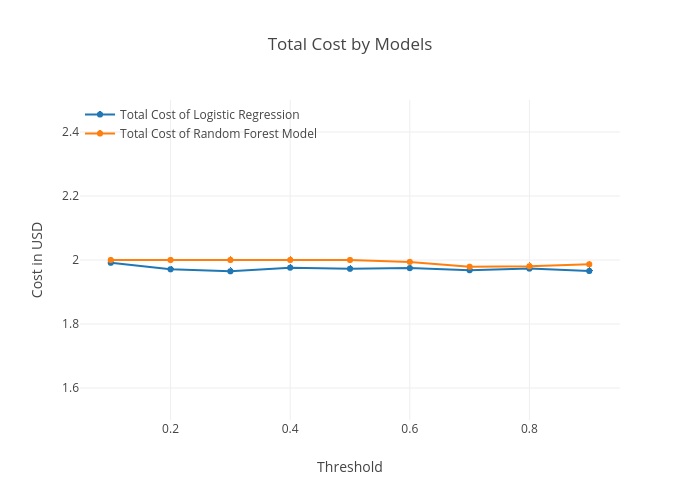

In [225]:
cost_bar_logit = go.Scatter(x = cost_df_logit.threshold,
                            y = cost_df_logit.cost,
                            name = 'Total Cost of Logistic Regression',
                            mode = 'lines+markers'
                           )
cost_bar_rfc = go.Scatter(x=cost_df_rfc.threshold,
                          y=cost_df_rfc.cost,
                          name='Total Cost of Random Forest Model',
                          mode = 'lines+markers'
                         )
layout = go.Layout(title = 'Total Cost by Models',
                  yaxis = dict(
                  title = 'Cost in USD',
                  showgrid = True,
                  range = [1.5, 2.5]),
                  xaxis = dict(
                  title = 'Threshold'),
                  legend = dict(
                      x = 0, 
                      y = 1, 
                      bgcolor = 'rgba(255, 255, 255, 0)',
                      bordercolor = 'rgba(255, 255, 255, 0)'
                  )
                  )
data = [cost_bar_logit, cost_bar_rfc]
fig = go.Figure(data = data, layout = layout)
py.image.ishow(fig)

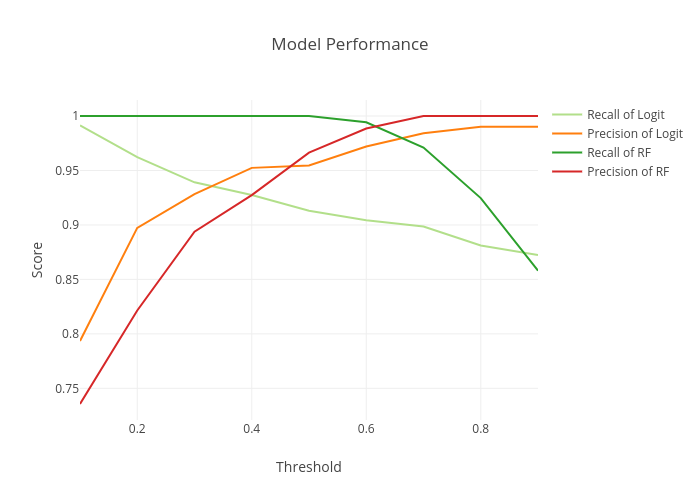

In [246]:
recall_logit = go.Scatter(x=cost_df_logit.threshold,
                          y=cost_df_logit.recall_score,
                          name='Recall of Logit',
                          mode = "lines",
                          marker = dict(
                              color = "rgb(178,223,138)"
                          )
                         )

recall_rfc = go.Scatter(x=cost_df_rfc.threshold,
                        y=cost_df_rfc.recall_score,
                        name='Recall of RF',
                        mode="lines",
                        marker=dict(
                            color = [1, 'rgb(227,26,28)']
                        )
                       )
    
precision_logit = go.Scatter(x=cost_df_logit.threshold,
                             y=cost_df_logit.precision_score,
                             name='Precision of Logit',
                             mode = "lines",
                             marker=dict(
                                 color = [0.01, 'rgb(178,223,138)']
                             )
                            )


precision_rfc = go.Scatter(x=cost_df_rfc.threshold,
                           y=cost_df_rfc.precision_score,
                           name='Precision of RF',
                           mode = "lines",
                           marker=dict(
                                 color =[0.85, 'rgb(251,154,153)']
                             )
                            )

layout = go.Layout(
    title='Model Performance',
    yaxis=dict(
        title='Score'
    ),
    xaxis=dict(
        title='Threshold'
    ),
    barmode = "group"
)
    

data = [recall_logit, precision_logit, recall_rfc, precision_rfc]

fig = go.Figure(data=data, layout=layout)

py.image.ishow(fig)

Combining the cost and model performance graph above, I can conclude that Random Forest model with threshold 0.8 is the optimal one, which can minizie the total cost while leave the model performance well.

### Bayesian Rish Minimization Classifer

In [247]:
def Create_Cost_DF(clf, x, y):
    prob_fraud = clf.predict_proba(x)[:,1]
    prob_legitimate = clf.predict_proba(x)[:,0]
    Amount = x.scaled_amount.tolist()
    y_true = y.Class.tolist()
    
    
    cost_df = pd.DataFrame({
        "t": y_true,
        "prob_fraud": prob_fraud,
        "prob_legitimate": prob_legitimate,
        "Amount": Amount
    }
    )
    
    cost_df["Ca"] = 2
    cost_df["risk_fraud"] = cost_df.Ca*cost_df.prob_fraud + cost_df.Ca*cost_df.prob_legitimate
    cost_df["risk_legitimate"] = cost_df.Amount*cost_df.prob_fraud
    
    
    '''
    if risk of classifying as fraud is less than the risk of classifying as legitimate, 
    then classify as fraud. ie. p = 1
    '''
    for i in range(len(y)):
        if cost_df.risk_fraud[i] <= cost_df.risk_legitimate[i]:
            cost_df.ix[i,"p"] = 1
        else:
            cost_df.ix[i,"p"] = 0
    
    cost_df["cost"] = cost_df.t*(cost_df.p*cost_df.Ca + (1 - cost_df.p)*cost_df.Amount) + (1 - cost_df.t)*cost_df.Ca
    
    return cost_df

In [250]:
cost_logit = Create_Cost_DF(logit, x_train_undersample_1, y_train_undersample_1)

recall_logit = recall_score(cost_logit.t, cost_logit.p)
precision_logit = precision_score(cost_logit.t, cost_logit.p)
mean_cost_logit = cost_logit.cost.mean()

print ("The recall of logit is %f" % (recall_logit))
print( "--------------------------------")
print ("The precision of logit is %f" % (precision_logit))
print ("--------------------------------")
print ("The cost of logit is %f" % (mean_cost_logit))

The recall of logit is 0.202899
--------------------------------
The precision of logit is 0.897436
--------------------------------
The cost of logit is 1.283139


In [252]:
cost_rfc = Create_Cost_DF(clf_rfc, x_train_undersample_1, y_train_undersample_1)

recall_rfc = recall_score(cost_rfc.t, cost_rfc.p)
precision_rfc = precision_score(cost_rfc.t, cost_rfc.p)
mean_cost_rfc = cost_rfc.cost.mean()

print ("The recall of RF is %f" % (recall_rfc))
print ("--------------------------------")
print ("The precision of RF is %f" % (precision_rfc))
print ("--------------------------------")
print ("The cost of RF is %f" % (mean_cost_rfc))

The recall of RF is 0.214493
--------------------------------
The precision of RF is 0.891566
--------------------------------
The cost of RF is 1.268037


Random Forest has lower cost, and higher recall and precision scores.

## Prediction on the test data

Recall is 0.844
Precision is 0.653
The cost is 2.000394


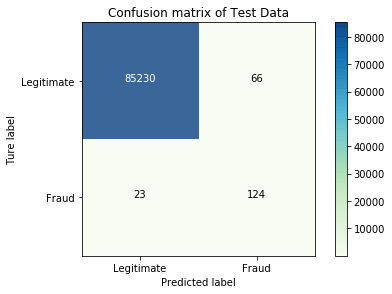

In [270]:
# Model 1: Random Forest with threshold 0.8

y_test_pred = clf_rfc.predict_proba(x_test)[:,1] > 0.8
y_test_pred = 1*y_test_pred

y_test_true = y_test
cm_test = confusion_matrix(y_test_true, y_test_pred)

classes_name = ['Legitimate', 'Fraud']

fig = plt.Figure(figsize=(14,5))
ax = fig.add_subplot(1,1,1)
plot_confusion_matrix(cm_test, classes_name,
                          title='Confusion matrix of Test Data'
                         )

print ("Recall is %.3f" % (float(cm_test.item(3))/(cm_test.item(3)+cm_test.item(2))))
print ("Precision is %.3f" % (float(cm_test.item(3))/(cm_test.item(3)+cm_test.item(1))))

cost_test_df = create_cost_df(clf_rfc, x_test, y_test, thresholds)
print ("The cost is %f" % (cost_test_df[cost_test_df.threshold == 0.8]["cost"]))

Recall is 0.844
Precision is 0.653
The cost is 2.000394


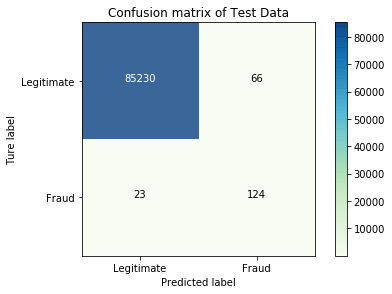

In [271]:
# Model 2: Random Forest Model with Risk Minimization Approach
y_test_pred = clf_rfc.predict_proba(x_test)[:,1] > 0.8
y_test_pred = 1*y_test_pred

y_test_true = y_test
cm_test = confusion_matrix(y_test_true, y_test_pred)

classes_name = ['Legitimate', 'Fraud']

fig = plt.Figure(figsize=(14,5))
ax = fig.add_subplot(1,1,1)
plot_confusion_matrix(cm_test, classes_name,
                          title='Confusion matrix of Test Data'
                         )

print ("Recall is %.3f" % (float(cm_test.item(3))/(cm_test.item(3)+cm_test.item(2))))
print ("Precision is %.3f" % (float(cm_test.item(3))/(cm_test.item(3)+cm_test.item(1))))

cost_test_df = create_cost_df(clf_rfc, x_test, y_test, thresholds)
print ("The cost is %f" % (cost_test_df[cost_test_df.threshold == 0.8]["cost"]))

they gave the same score, it's hard to say which model is better. From my perspective at this point, I prefer model 2, because model 2 in the training prash had lower cost. 